# QQ Plots

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Main functions to calculate and plot

In [4]:
def get_quantiles(x, y):
    
    '''
    This function receives two objects (X,Y), such as lists, arrays or Pandas Series, with numerical values only and do the following:
    - Convert the objects to arrays;
    - Sort them in an ascending order
    - Computes 100 quantiles from both arrays
    - Return two lists containing the quantiles from each object
    
    The objects may contain NaN values and the quantile calculation will automatically ignore them, since we are using
    the function np.nanquantile. 
    '''
    
    # Transform x object into array and sort it
    x_arr = np.sort(np.array(x))
    # Get the ordered 100 quantiles from the new array and transform it all into a list
    x_quantiles = [np.nanquantile(x_arr, i, axis=None) for i in (np.arange(0.0, 1.01, 0.01))]
        
    # Transform x vector into array and sort it:
    y_arr = np.sort(np.array(y))
    
    # Get the ordered 100 quantiles from the new array and transform it all into a list
    y_quantiles = [np.nanquantile(y_arr, i, axis=None) for i in (np.arange(0.0, 1.01, 0.01))]
        
    return x_quantiles, y_quantiles

# This function was actually written here: 
# https://stackoverflow.com/questions/22104256/does-matplotlib-have-a-function-for-drawing-diagonal-lines-in-axis-coordinates
# It's really useful for quickly plotting Identity line (X=Y) on the scatter plot

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

# Example

Consider this dataset containing syntetic Copper (Cu) and Gold (Au) grade values and the respective estimated grades for the same point. 

We can compare the distribution of both variables, by plotting a QQplot with the real (syntetic) grade versus the estimated.

In [5]:
df = pd.read_csv('data.csv')

# This dataset contains NaN values, but the will be ignored with the quantiles_calc funtion
df

,ZONE,Cu,Au,Cu_SK,Au_SK
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,1.0,0.221,4.032,0.227474,4.076341
3,1.0,0.221,4.033,0.230934,4.050448
4,1.0,0.221,4.034,0.236063,4.040863
...,...,...,...,...,...
6935,2.0,2.137,5.522,2.166212,5.509402
6936,2.0,2.138,5.523,2.145770,5.489760
6937,NaN,NaN,NaN,NaN,NaN
6938,NaN,NaN,NaN,NaN,NaN


## Compare Copper and Gold distributions

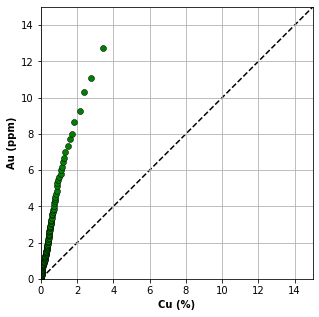

In [12]:
x_quantiles, y_quantiles = get_quantiles(x = df.Cu, y=df.Au)

f, ax = plt.subplots(figsize=(10,5))

ax.plot(x_quantiles, y_quantiles, marker='o', 
                          mfc='green', mec='black', markeredgewidth=0.5, lw=0 )

#Add equality line (X=Y)
add_identity(axes=ax, color='black', ls='--', zorder=-1)

# Lock aspect ration to 1 (really good for QQ plots)
ax.set_aspect(1)

# Config x and y lim
ax.set_xlim(0,15)
ax.set_ylim(0,15)

# Add labels
ax.set_xlabel('Cu (%)', fontweight='bold')
ax.set_ylabel('Au (ppm)', fontweight='bold')


# Add some grid man
ax.grid()

## Using it in a for loop

Suppose you want to plot both Cu x Cu_SK and Au x Au_SK for each ZONE. One can do it by:


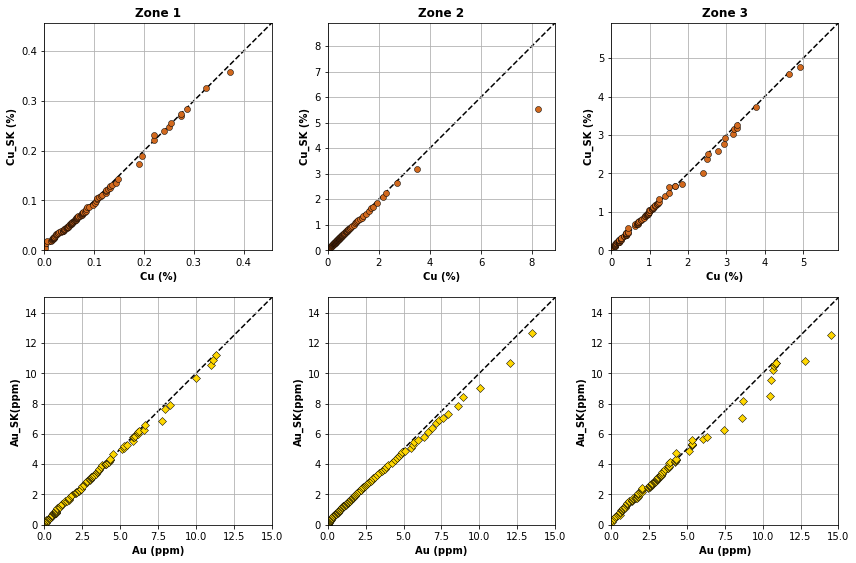

In [10]:
f, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(12,8))

real = ['Cu', 'Au']
estimate = ['Cu_SK', 'Au_SK']
ZONE=[1,2,3]

colors=['chocolate', 'gold']
markers=['o', 'D']

for row in range(2):
    for col in range(3):
        
        # Calculate the quantiles and store them sing our function
        x_quantiles, y_quantiles = get_quantiles(np.array(df[df.ZONE==ZONE[col]][real[row]]), 
                                       np.array(df[df.ZONE==ZONE[col]][estimate[row]]))
        
        # Actual plotting 
        ax[row, col].plot(x_quantiles, y_quantiles, marker=markers[row], 
                          mfc=colors[row], mec='black', markeredgewidth=0.5, lw=0)
    
        # Zone Titles
        if (row==0):
            ax[row, col].set_title(('Zone %0.0f' %(ZONE[col])), fontweight='bold')
        
        # X and Y labels
        if row==0:
            ax[row, col].set_xlabel('Cu (%)', fontweight='bold')
            ax[row, col].set_ylabel('Cu_SK (%)', fontweight='bold')
        else:
            ax[row, col].set_ylabel('Au_SK(ppm)', fontweight='bold')
            ax[row, col].set_xlabel('Au (ppm)', fontweight='bold')
        
        # Format the limits
        
        # For the Copper - maybe not the best option ou there
        if row==0:
            if (np.array(y_quantiles).max()>np.array(x_quantiles).max()):
                ax[row, col].set_xlim(0,np.array(y_quantiles).max()+np.array(y_quantiles).mean())
                ax[row, col].set_ylim(0,np.array(y_quantiles).max()+np.array(y_quantiles).mean())
            else:
                ax[row, col].set_xlim(0,np.array(x_quantiles).max()+np.array(x_quantiles).mean())
                ax[row, col].set_ylim(0,np.array(x_quantiles).max()+np.array(x_quantiles).mean())
        
        # For the gold only
        else: 
            ax[row, col].set_xlim(0,15)
            ax[row, col].set_ylim(0,15)
        
        #Add equality line
        add_identity(ax[row,col], color='black', ls='--', zorder=-1)
        
        # Lock aspect ration to 1 (really good for QQ plots)
        ax[row, col].set_aspect(1)
        
        # Add some grid
        ax[row, col].grid()

plt.tight_layout()